<a href="https://colab.research.google.com/github/vichacker1234/Pyhton_archives/blob/main/CLUSTER_CLIENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SEGMENTACIÓN DE CLIENTES USANDO TÉNICAS DE CLUSTERING**

In [ ]:
!pip install label 

In [7]:
#Se importan las principales librerías para gráficos,cálculos numéricos manejo de dataframe
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns




In [8]:
#Se importan las herramientas que se van a usar de sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

In [9]:
#Manejo de los warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
data_clientes=pd.read_csv('/content/drive/MyDrive/segmentacion_clientes/campaña_marketing.csv',sep='\t')
data_clientes.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [17]:
#Determinar el número de observaciones y el número de variables
np.shape(data_clientes)

(2240, 29)

Se puede apreciar que el dataframe tiene 2240 observaciones y 24 variables


**LIMPIEZA DE LOS DATOS O DE LA DATA**

In [18]:
#Primero se va a analizar la información general del dataframe
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [22]:
#Se van a remover los nas
data_clientes1=data_clientes.dropna()
data_clientes1.info()
np.shape(data_clientes1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

(2216, 29)

**Exploración categórica de los datos***

In [23]:
#Estado civil
#Se va a determinar la frecuencia absoluta de cada categoría en estados civil
data_clientes1['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Se puede apreciar que la 857 clientes están casados y que 573 viven con sus parejas

In [25]:
#Nivel educativo
#Se va a determinar la frecuencia absoluta de cada categoría en el nivel educativo
data_clientes1['Education'].value_counts()



Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Aquí se puede notar que la mayoría de clientes tienen educación básica (1116)

In [41]:
data_clientes1["Dt_Customer"] = pd.to_datetime(data_clientes1["Dt_Customer"])
dates = []
for i in data_clientes1["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data_clientes1["Customer_For"] = days
data_clientes1["Customer_For"] = pd.to_numeric(data_clientes1["Customer_For"], errors="coerce")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
data_clientes1["Age"] = 2021-data_clientes1["Year_Birth"]

#Total gastos en varios artículos
data_clientes1["Spent"] = data_clientes1["MntWines"]+ data_clientes1["MntFruits"]+ data_clientes1["MntMeatProducts"]+ data_clientes1["MntFishProducts"]+ data_clientes1["MntSweetProducts"]+ data_clientes1["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data_clientes1["Living_With"]=data_clientes1["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data_clientes1["Children"]=data_clientes1["Kidhome"]+data_clientes1["Teenhome"]

#Feature for total members in the householde
data_clientes1["Family_Size"] = data_clientes1["Living_With"].replace({"Alone": 1, "Partner":2})+ data_clientes1["Children"]

#Feature pertaining parenthood
data_clientes1["Is_Parent"] = np.where(data_clientes1.Children> 0, 1, 0)

#Segmenting education levels in three groups
data_clientes1["Education"]=data_clientes1["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data_clientes2=data_clientes1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data_clientes_final= data_clientes2.drop(to_drop, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

**ESTADÍSTICOS DESCRIPTIVOS DE LAS VARIABLES CUANTITATIVAS**[texto del 

In [45]:
data_clientes_final.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,52.179603,607.075361,0.947202,2.592509,0.714350,4.423735e+16
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825,2.008532e+16
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000,2.937600e+16
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,51.000000,396.500000,1.000000,3.000000,1.000000,4.432320e+16
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,1048.000000,1.000000,3.000000,1.000000,5.927040e+16
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,128.000000,2525.000000,3.000000,5.000000,1.000000,9.184320e+16


<Figure size 432x288 with 0 Axes>

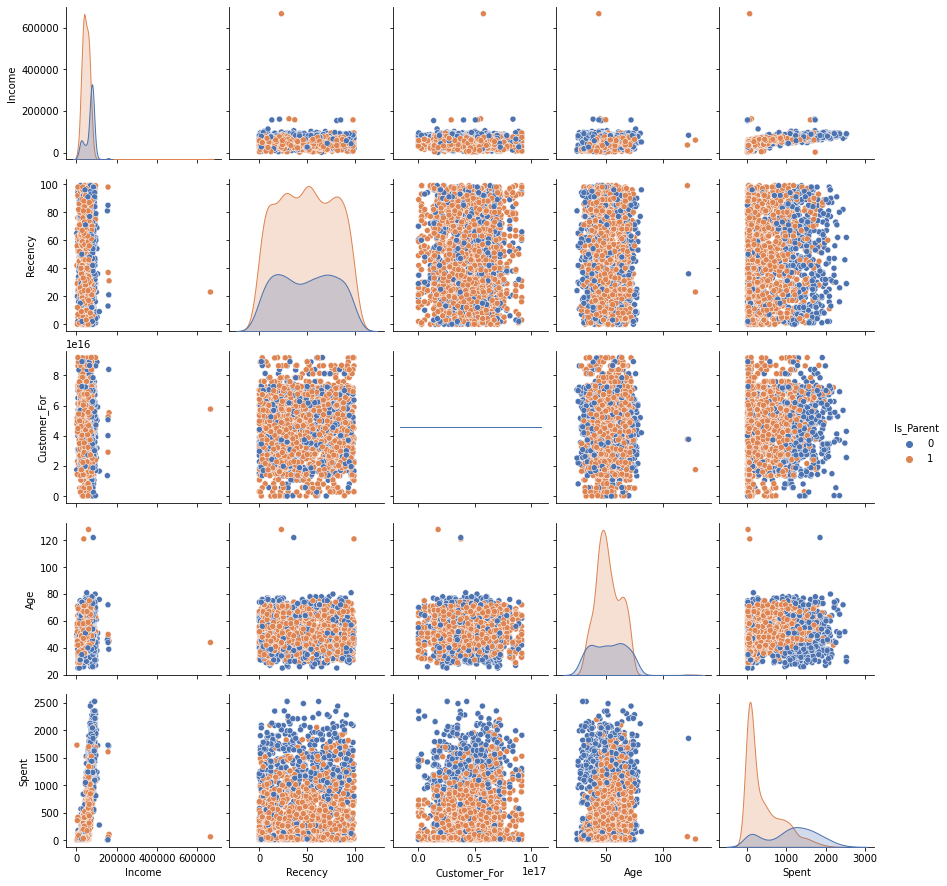

In [47]:
#Se construye un pairplot sujeto a la categoría de ser o no padre 
plt.figure()
sns.pairplot(data_clientes_final[[ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]],hue="Is_Parent",palette="deep")



La gráfica sugiere que hay presencia de outliers en ingresos y edad. Así que se van a remover estos outliers

In [54]:
#Remover los datos atípicos estableciendo criterios lógicos para la eliminación de estos 
#Establecer las edades máximo de 90
data_clientes_final= data_clientes_final[(data_clientes_final["Age"]<90)]
#Establecer los ingresos máximos de 600000
data_clientes_final1 = data_clientes_final[(data_clientes_final["Income"]<600000)]
print("El número total de observaciones después de haber removido outliers es:", len(data_clientes_final1))

El número total de observaciones después de haber removido outliers es: 2212


**ANÁLISIS DE CORRELACIÓN ENTRE LAS VARIABLES CUANTITATIVAS**

In [56]:
corrmat= data_clientes_final1.corr()
print(corrmat)


                       Income   Kidhome  Teenhome   Recency     Wines  \
Income               1.000000 -0.514523  0.034565  0.007965  0.688209   
Kidhome             -0.514523  1.000000 -0.039066  0.010623 -0.497203   
Teenhome             0.034565 -0.039066  1.000000  0.014392  0.003945   
Recency              0.007965  0.010623  0.014392  1.000000  0.015981   
Wines                0.688209 -0.497203  0.003945  0.015981  1.000000   
Fruits               0.507354 -0.373258 -0.175905 -0.005257  0.385844   
Meat                 0.692279 -0.439031 -0.261134  0.022914  0.568081   
Fish                 0.520040 -0.388643 -0.205235  0.000788  0.396915   
Sweets               0.523599 -0.377843 -0.163107  0.025244  0.389583   
Gold                 0.388299 -0.354922 -0.018579  0.018148  0.391461   
NumDealsPurchases   -0.108207  0.216594  0.386805  0.002591  0.009117   
NumWebPurchases      0.459265 -0.372327  0.162239 -0.005680  0.553663   
NumCatalogPurchases  0.696589 -0.504598 -0.112477  

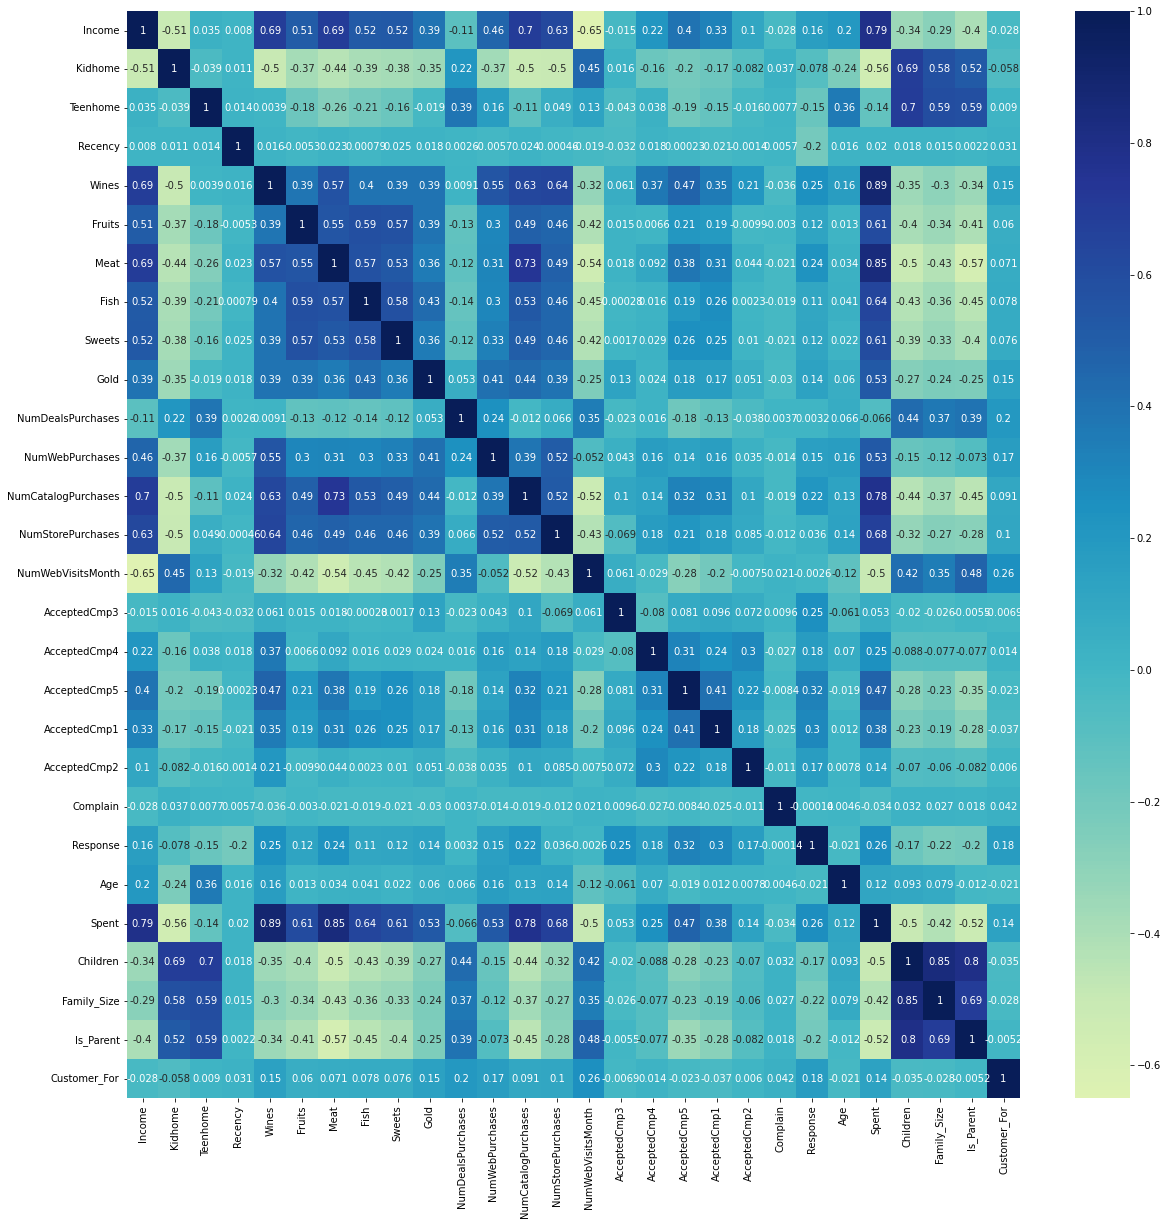

In [58]:
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="YlGnBu", center=0)

Ahora se van a preprocesar los datos para realizar las operaciones de clustering o agrupamiento

En primer lugar se van a codificar las variables cualitativas

In [63]:
#Se va  aobtener la lista de variables categóricas
s = (data_clientes_final1.dtypes == 'object')
object_cols = list(s[s].index)


In [65]:
#Se puede verificar cuales de las siguientes variables son categóricas
print(s)
print(object_cols)

Education               True
Income                 False
Kidhome                False
Teenhome               False
Recency                False
Wines                  False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Spent                  False
Living_With             True
Children               False
Family_Size            False
Is_Parent              False
Customer_For           False
dtype: bool
['Education', 'Living_With']


In [71]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data_clientes_final1[i]=data_clientes_final1[[i]].apply(LE.fit_transform)
    
print("Todas las categorías ahora son numéricas")

Todas las categorías ahora son numéricas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
print("Las variables categóricas en el conjunto de datos es:", object_cols)


Las variables categóricas en el conjunto de datos es: ['Education', 'Living_With']


In [76]:
#Crear una copia del dataframe
clientes_final= data_clientes_final1.copy()
#crear un subconjunto de marco de datos eliminando las características de las ofertas aceptadas y las promociones
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
clientes_final1= clientes_final.drop(cols_del, axis=1)
#Escalado
scaler = StandardScaler()
scaler.fit(clientes_final1)
scaled_ds = pd.DataFrame(scaler.transform(clientes_final1),columns= clientes_final1.columns )
print("Todas las características han sido estandarizados")

Todas las características han sido escaladas


In [77]:
#Los datos estandarizados se usan para reducir la dimensionalidad
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Customer_For
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,1.973583
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-1.665144
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,-0.172664
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-1.923210
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,-0.822130


**REDUCCIÓN DE LA DIMENSIONALIDAD**

En este caso se va a hacer reducción de la dimensionalidad usando PCA. En este caso se va a reducir la dimensionalidad a 3 componentes principales.


In [81]:
#Iniciando la reducción de dimensionalidad a 3 componentes principales
pca = PCA(n_components=3)
#Ajuste del análisis de componente principales
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
#Resumen de los componentes principales
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.424437e-18,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,6.424437e-17,1.706839,-4.312177,-1.328326,-0.158119,1.242284,6.142715
col3,2212.0,6.183521e-17,1.221957,-3.530119,-0.828809,-0.021889,0.799302,6.615423


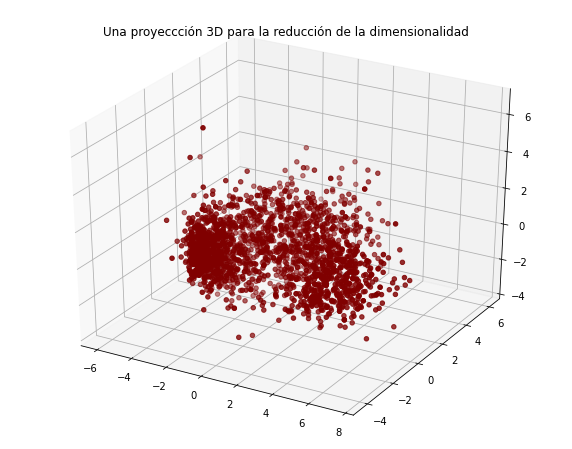

In [96]:
#Una proyección de los datos en la reduccción de la dimensionalidad
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
colors = ('r', 'g', 'b')

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Una proyeccción 3D para la reducción de la dimensionalidad")
plt.show()

Ahora a partir de estos resultados, se va a implementar el método de clustering jerárquico o agrupamiento jerárquico. Esto se hace con el objetivo de encontrar el número de klusters o grupos óptimo. Teniendo en cuenta esto, se va a a usar el método del codo, el cual es un buen criterio para elegir klusters

Pasos de la agrupación

* Método del codo para determinar el número de clusters a formar
* Agrupación mediante clustering aglomerativo
* Examen de los conglomerados formados mediante un gráfico de dispersión

Método del codo para determinar el número adecuado de clusters:


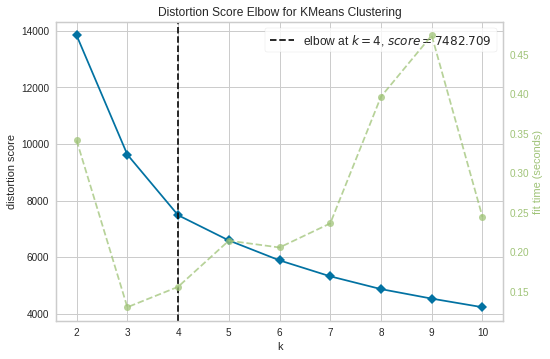

In [100]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Método del codo para determinar el número adecuado de clusters:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [102]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Agregando la variable de clusters al conjunto de datos originales
clientes_final1["Clusters"]= yhat_AC

In [103]:
#visualización del dataframe
clientes_final1.head(10)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Customer_For,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,4,7,64,1617,0,0,1,0,83894400000000000,2
1,0,46344.0,1,1,38,11,1,6,2,1,...,2,5,67,27,0,2,3,1,10800000000000000,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,10,4,56,776,1,0,2,0,40780800000000000,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,4,6,37,53,1,1,3,1,5616000000000000,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,6,5,40,422,1,1,3,1,27734400000000000,0
5,1,62513.0,0,1,16,520,42,98,0,42,...,10,6,54,716,1,1,3,1,39139200000000000,0
6,0,55635.0,0,1,34,235,65,164,50,49,...,7,6,50,590,0,1,2,1,65059200000000000,0
7,1,33454.0,1,0,32,76,10,56,3,1,...,4,8,36,169,1,1,3,1,42163200000000000,1
8,1,30351.0,1,0,19,14,0,24,3,3,...,2,9,47,46,1,1,3,1,47347200000000000,1
9,1,5648.0,1,1,68,28,0,6,1,1,...,0,20,71,49,1,2,4,1,23155200000000000,3


In [118]:
import matplotlib
from matplotlib import colors
from matplotlib.colors import ListedColormap

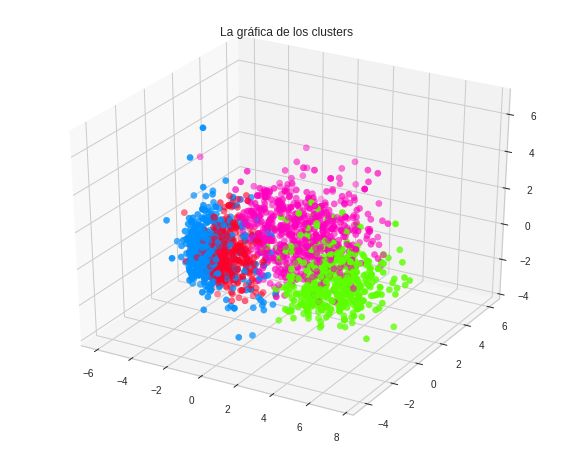

In [122]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=clientes_final1["Clusters"], marker='o',cmap='gist_rainbow_r')
ax.set_title("La gráfica de los clusters")
plt.show()

In [108]:
ax.scatter?